<a href="https://colab.research.google.com/github/SohaHussain/Text-Readability/blob/main/text_readability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [73]:
# for data engineering
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pex
from plotly import graph_objects as go
import missingno as msno
from wordcloud import WordCloud

# NLP
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re 

import tqdm
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading and Reading Data

In [2]:
from google.colab import files
upload  = files.upload()
for fn in upload.keys():
  print('user uploaded file name "{name}" '.format(name=fn))


Saving test.csv to test.csv
user uploaded file name "test.csv" 


In [3]:
from google.colab import files
upload  = files.upload()
for fn in upload.keys():
  print('user uploaded file name "{name}" '.format(name=fn))

Saving train.csv to train.csv
user uploaded file name "train.csv" 


In [4]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         7 non-null      object
 1   url_legal  3 non-null      object
 2   license    3 non-null      object
 3   excerpt    7 non-null      object
dtypes: object(4)
memory usage: 352.0+ bytes


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2834 non-null   object 
 1   url_legal       830 non-null    object 
 2   license         830 non-null    object 
 3   excerpt         2834 non-null   object 
 4   target          2834 non-null   float64
 5   standard_error  2834 non-null   float64
dtypes: float64(2), object(4)
memory usage: 133.0+ KB


In [7]:
train_df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


# Missing Values

In [8]:
train_df.isna().sum()

id                   0
url_legal         2004
license           2004
excerpt              0
target               0
standard_error       0
dtype: int64

Here the white space indicates the missing values.
We observe that only url_legal and license columns have missing values.

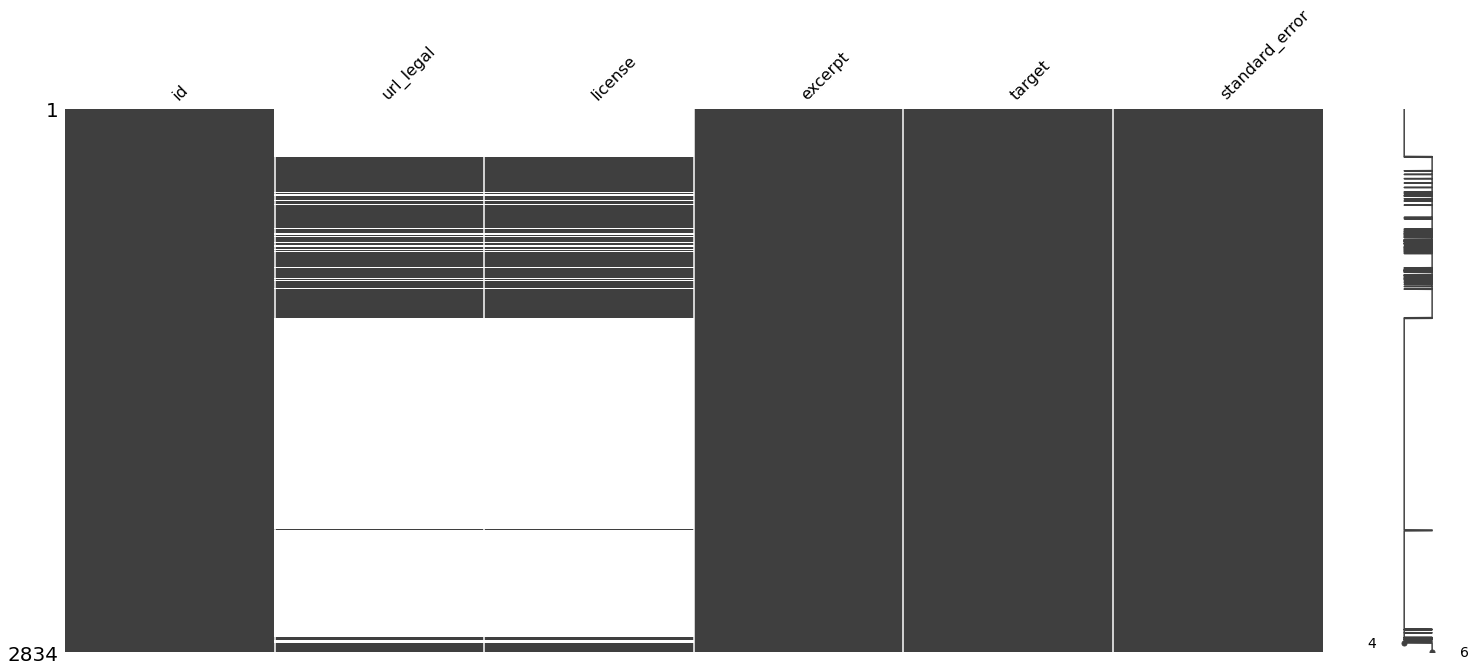

In [9]:
msno.matrix(train_df)

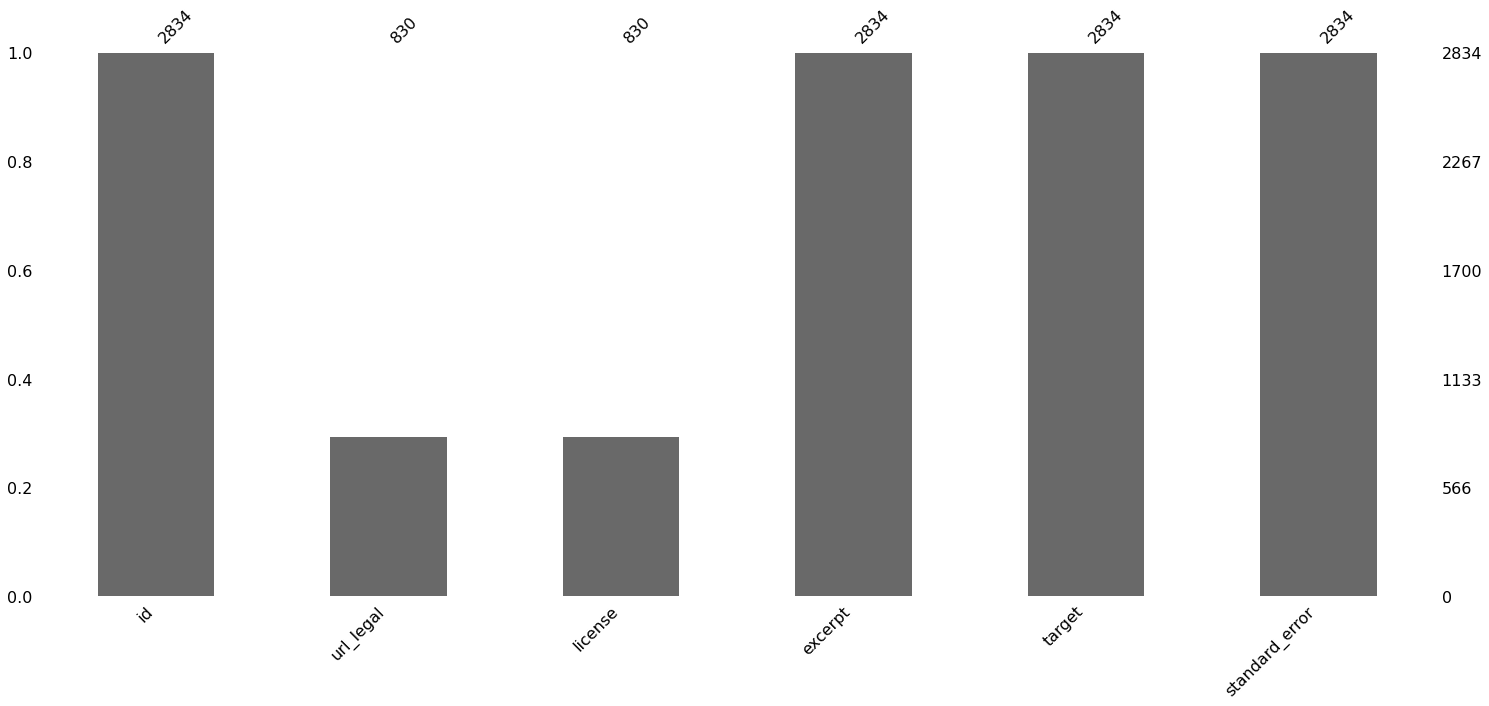

In [10]:
msno.bar(train_df)

# Data Visualization and Preprocessing

In [11]:
train_df['excerpt'].iloc[0]

'When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThese rugs were for prizes, one for the girls and one for the boys. And this was the game.\nThe girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.\nThis would have been an easy matter, but each traveller was obliged to wear snowshoes.'

In [12]:
# removing \n
train_df['excerpt'] = train_df['excerpt'].apply(lambda txt: txt.replace('\n'," "))
train_df['excerpt'].iloc[0]

'When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape. The floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches. At each end of the room, on the wall, hung a beautiful bear-skin rug. These rugs were for prizes, one for the girls and one for the boys. And this was the game. The girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole. This would have been an easy matter, but each traveller was obliged to wear snowshoes.'

In [13]:
test_df['excerpt'] = test_df['excerpt'].apply(lambda txt : txt.replace('\n'," "))

In [14]:
# function to plot histogram
def hist_plot(df = pd.DataFrame, column = str, bins = 20, xtitle = None, ytitle = None, color = 'Orange', edge_color = 'Black', font_size = 10):
  fig, ax = plt.subplots(figsize = (10,5)) # returns a tuple of 2 (figure and axes) so we are unpacking it
  ax.hist(df[column],bins = bins,edgecolor = edge_color,color = color)
  ax.set_title(f'Histogram of {column} ', fontsize = font_size+5)
  ax.set_xlabel(column,fontsize = font_size)
  ax.set_ylabel("Number of observations",fontsize = font_size)
  plt.show()


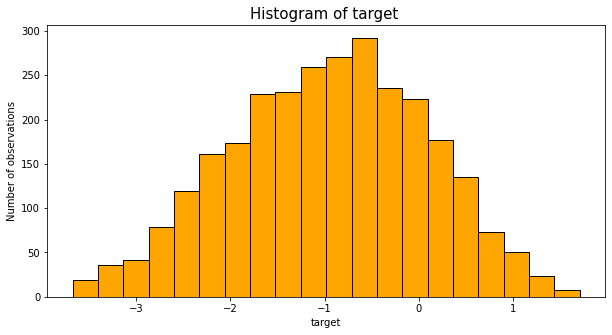

In [15]:
hist_plot(train_df,column = 'target')

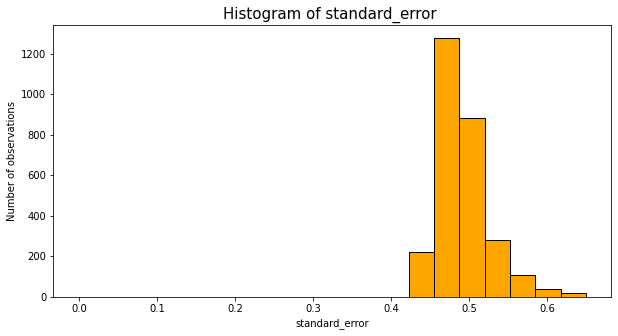

In [16]:
hist_plot(train_df,column = 'standard_error')

In [17]:
# function to create a word cloud
def word_cloud(df, title, column, font_size = 10, fig_size = (10,10), width = 300, height = 300):
  txt = ''.join([text for text in df[column]]) # adding text from specified column to the variable txt
  wc = WordCloud(width = width, height = height, background_color='White').generate(txt)
  plt.figure(figsize=fig_size)
  plt.imshow(wc)
  plt.title(title,fontsize = font_size)
  plt.show() 

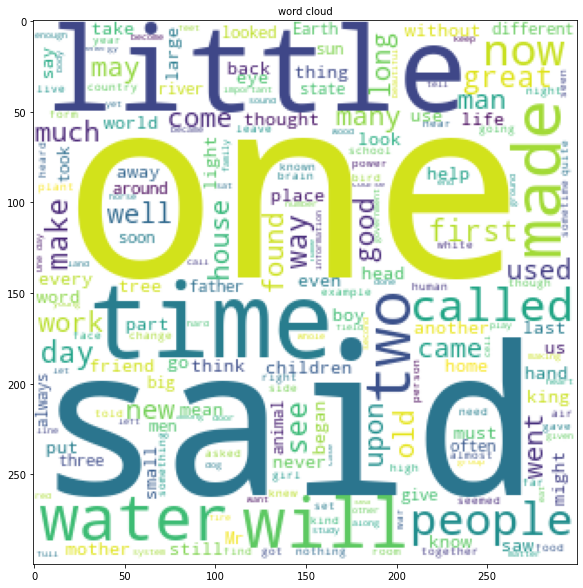

In [18]:
word_cloud(train_df,'word cloud',column = 'excerpt')

In [19]:
# function to modify our text
def modify_text(df):
  text_list=[]
  for text in tqdm(df['excerpt'].values):
     #tqdm outputs a smart progress bar by wrapping around any iterable
     text = re.sub('[^a-zA-Z]', ' ', text) #replaces non alphabets with white space and store in text
     text = text.lower()
     text = nltk.word_tokenize(text) #breaks words into syylables
     [word for word in text if not word in set(stopwords.words("english"))] # excludes stopwords(an, a, is) from text
     #Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item.
     #t links words with similar meanings to one word. 
     lemmatizer = nltk.WordNetLemmatizer() 
     text = [lemmatizer.lemmatize(word) for word in text]
     text = " ".join(text)
     text_list.append(text)
  text_list = pd.Series(text_list)
  text_list.column = ['modified text']
  return text_list



In [20]:
modified_train_text = modify_text(train_df)

100%|██████████| 2834/2834 [01:12<00:00, 39.11it/s]


In [21]:
modified_test_text = modify_text(test_df)

100%|██████████| 7/7 [00:00<00:00, 42.81it/s]


Now we will be defining new features since our original data frame does not contain many features that would be helpful for machine to make a good prediction.
Taking into consideration the excerpt and stopwords, we are going to be creating new feautres such as total number of words, sentence length, overall change in the text length and other features that are important for getting the machine learning outputs. The function would return the final dataframe that contains all the preprocessed output along with the newly created features that are important for machine learning.

In [22]:
# function to create new features
def new_features(df, stop_words):
  sentences = []
  num_of_words = []
  sent_length = []
  word_length = []
  lemma_length = []
  num_of_lemmas = []
  preprocessed_essay_length = []
  initial_text_length = []
  num_of_sentences = []
  text_shortage = []

  for text in tqdm(df['excerpt'].values):
    initial_len = len(text)
    initial_text_length.append(initial_len)
    num_sentences = len(sent_tokenize(text)) #sent_tokenize splits paragraph into sentences
    num_of_sentences.append(num_sentences)
    text = re.sub('[^a-zA-Z]',' ',text)
    text = text.lower()
    text = word_tokenize(text)
    num_words = len(text)
    num_of_words.append(num_words)
    sent_length.append(num_words/num_sentences)
    word_length.append(initial_len/num_words)
    text = [word for word in text if not word in stop_words]
    lemmatizer = nltk.WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    num_lemmas = len(text)
    num_of_lemmas.append(num_lemmas)
    text = " ".join(text)
    preprocessed_essay_length_value = len(text)
    preprocessed_essay_length.append(preprocessed_essay_length_value)
    lemma_length.append(preprocessed_essay_length_value/num_lemmas)   
    text_shortage.append(preprocessed_essay_length_value/initial_len)
  final_df = pd.concat([pd.Series(sent_length), pd.Series(num_of_words),
                             pd.Series(word_length), pd.Series(lemma_length),
                             pd.Series(num_of_sentences), pd.Series(initial_text_length),
                             pd.Series(num_of_lemmas), pd.Series(preprocessed_essay_length),
                             pd.Series(text_shortage)], axis = 1)
  final_df.columns = ["sentence_length", "num_of_words", "word_length",
                           "lemma_length", "num_of_sentences",
                           "initial_text_length", "num_of_lemmas",
                           "preprocessed_essay_length", "text_shortage"]
    
  return final_df


In [23]:
final_train_df = new_features(train_df,stop_words=set(stopwords.words("english")))

100%|██████████| 2834/2834 [00:04<00:00, 617.10it/s]


In [24]:
final_train_df.head()

,sentence_length,num_of_words,word_length,lemma_length,num_of_sentences,initial_text_length,num_of_lemmas,preprocessed_essay_length,text_shortage
0,16.454545,181,5.480663,6.494505,11,992,91,591,0.595766
1,11.466667,172,5.447674,6.482353,15,937,85,551,0.588047
2,15.636364,172,5.279070,6.273810,11,908,84,527,0.580396
3,33.400000,167,5.443114,6.095745,5,909,94,573,0.630363
4,30.200000,151,4.788079,5.581081,5,723,74,413,0.571231


In [25]:
final_test_df = new_features(test_df,stop_words=set(stopwords.words("english")))

100%|██████████| 7/7 [00:00<00:00, 473.20it/s]


In [26]:
final_test_df.head()

,sentence_length,num_of_words,word_length,lemma_length,num_of_sentences,initial_text_length,num_of_lemmas,preprocessed_essay_length,text_shortage
0,18.750000,150,5.146667,6.732394,8,772,71,478,0.619171
1,20.555556,185,5.227027,5.947917,9,967,96,571,0.590486
2,14.833333,178,5.325843,6.470588,12,948,85,550,0.580169
3,25.714286,180,6.355556,7.633929,7,1144,112,855,0.747378
4,27.833333,167,6.550898,7.833333,6,1094,102,799,0.730347


## observing relations between new features formed

### heatmap

In [27]:
plot_df = pd.concat([final_train_df,train_df['target']],axis=1)


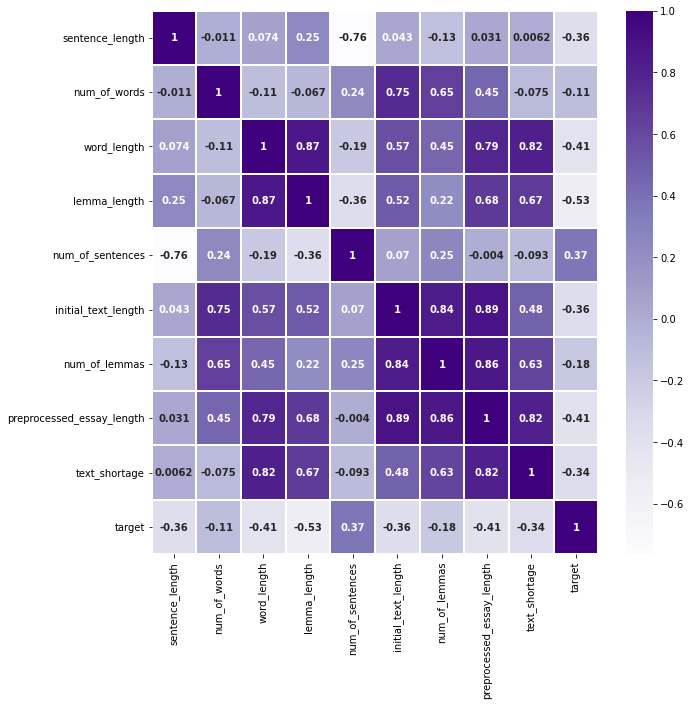

In [28]:
corr_mat = plot_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,annot=True,cmap='Purples',linewidths=1,annot_kws={"weight":"bold","fontsize":10})

Above is a heatmap plotted that gives us a good idea about the correlation between different features that are important for machine learning.

By observing the values above, one could get an understand there is a slight negative correlation between lemma_length and the difficulty of the text. In addition, we also see a negative correlation between average word length and the text's difficulty respectively. We see that there is also a clear negative correlation between sentence length and number of sentences. This means that as the number of sentences increase, there is a higher possibility that there can be a high sentence length. However, this does not mean that correlation is equal to causation. But based on the information and the context, we might assure that there is causation between features respectively.



### Scatterplots

In [29]:
def scatterplot_function(df: pd.DataFrame, X, Y, figsize = (7, 7),color = 'orange'):
    plt.figure(figsize = figsize)
    sns.scatterplot(data = df, x = X, y = Y,color = color)
    plt.title(f'Scatterplot between {X} and {Y}')
    plt.show()

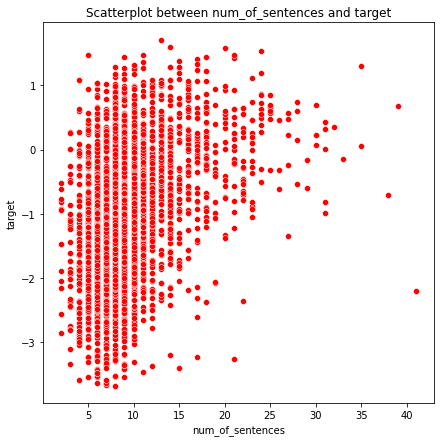

In [30]:
scatterplot_function(plot_df, X = 'num_of_sentences', Y = 'target',color = 'red')

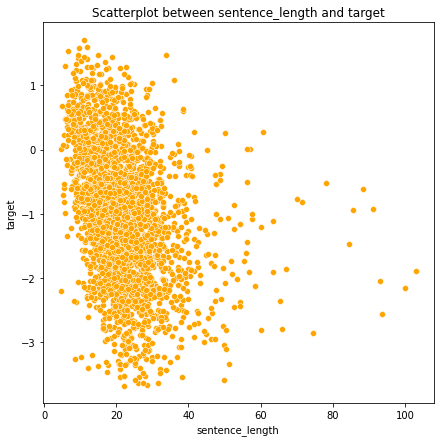

In [31]:
scatterplot_function(plot_df, X = 'sentence_length', Y = 'target')

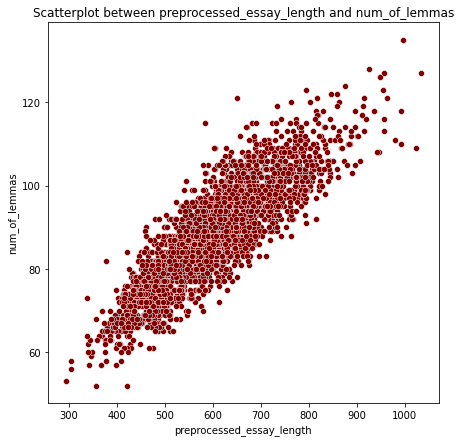

In [32]:
scatterplot_function(plot_df, X = 'preprocessed_essay_length', Y = 'num_of_lemmas', figsize = (7, 7), color = 'maroon')

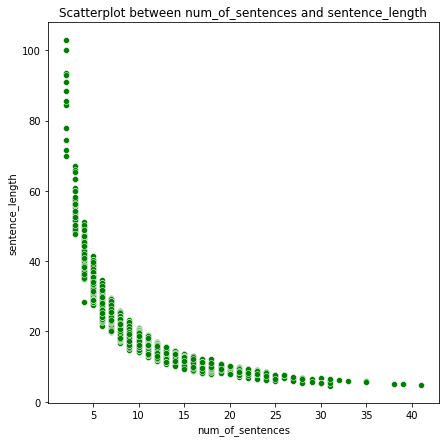

In [33]:
scatterplot_function(plot_df, X = 'num_of_sentences', Y = 'sentence_length', color = 'green')

In [34]:
# function to generate features using punctuations in the excerpts
def punc_features(df:pd.DataFrame):
  commas = []
  semicolons = []
  exclamations = []
  questions = []
  quotes = []
  periods = []
  longest_word = []

  for i in range(len(df)):
        text = df['excerpt'].iloc[i]
        commas.append(text.count(","))
        semicolons.append(text.count(";"))
        exclamations.append(text.count("!"))
        questions.append(text.count("?"))
        quotes.append(text.count('"'))
        periods.append(text.count('.'))
        word_len = [len(w) for w in text.split(" ")]
        longest_word.append(np.max(word_len))
  
  punc_features_df =pd.concat((pd.Series(commas), pd.Series(semicolons), pd.Series(exclamations),
                               pd.Series(questions), pd.Series(quotes), pd.Series(periods),
                                pd.Series(longest_word)), axis = 1)
  punc_features_df.columns = ["num_of_commas", "num_of_semicolons", "num_of_exclamations",
                                "num_of_questions", "num_of_quotes", "num_of_periods", 
                                "longest_word"]
                                
  return punc_features_df

In [35]:
punc_features_train_df = punc_features(train_df)

In [36]:
punc_features_train_df.head()

,num_of_commas,num_of_semicolons,num_of_exclamations,num_of_questions,num_of_quotes,num_of_periods,longest_word
0,14,0,0,0,0,11,11
1,24,0,5,2,12,10,12
2,17,2,1,0,10,11,14
3,23,2,0,0,0,5,13
4,13,10,0,0,0,5,12


In [37]:
punc_features_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   num_of_commas        2834 non-null   int64
 1   num_of_semicolons    2834 non-null   int64
 2   num_of_exclamations  2834 non-null   int64
 3   num_of_questions     2834 non-null   int64
 4   num_of_quotes        2834 non-null   int64
 5   num_of_periods       2834 non-null   int64
 6   longest_word         2834 non-null   int64
dtypes: int64(7)
memory usage: 155.1 KB


In [38]:
punc_features_test_df = punc_features(test_df)

In [39]:
punc_features_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   num_of_commas        7 non-null      int64
 1   num_of_semicolons    7 non-null      int64
 2   num_of_exclamations  7 non-null      int64
 3   num_of_questions     7 non-null      int64
 4   num_of_quotes        7 non-null      int64
 5   num_of_periods       7 non-null      int64
 6   longest_word         7 non-null      int64
dtypes: int64(7)
memory usage: 520.0 bytes


In [40]:
plot_df = pd.concat([punc_features_train_df,train_df['target']],axis=1)

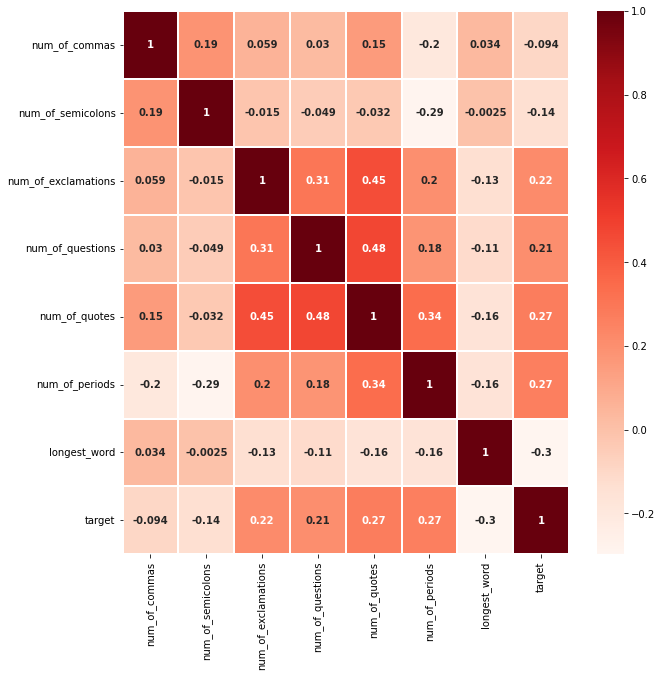

In [41]:
corr_mat = plot_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,annot=True,cmap='Reds',linewidths=1,annot_kws={"weight":"bold","fontsize":10})

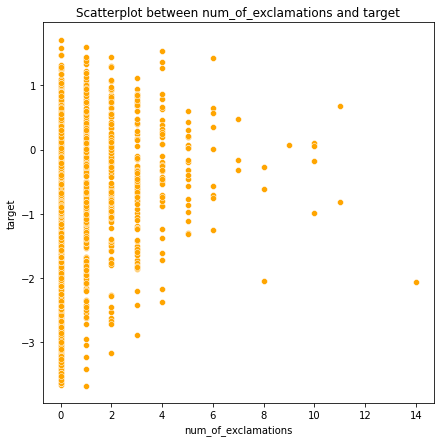

In [42]:
scatterplot_function(plot_df,X='num_of_exclamations',Y='target')

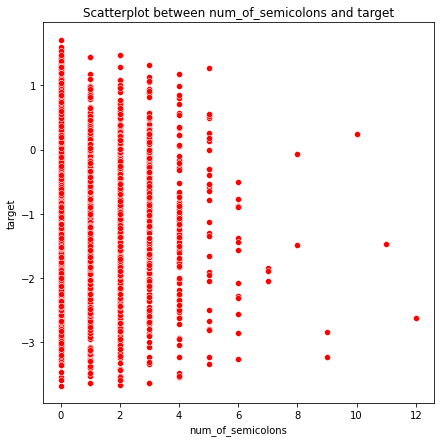

In [43]:
scatterplot_function(plot_df,X='num_of_semicolons',Y='target',color = 'red')

In [44]:
train_df['excerpt_length'] = train_df.excerpt.apply(len)
test_df['excerpt_length'] = test_df.excerpt.apply(len)

## More data processing

CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis).

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.

In [45]:
def Count_Vectorizer(df: pd.DataFrame):
    vectorizer = CountVectorizer()
    vectorizer.fit(df['excerpt'])
    converted_vector = vectorizer.transform(df['excerpt'])
    return converted_vector

In [46]:
Count_Vectorizer(train_df)

<2834x26833 sparse matrix of type '<class 'numpy.int64'>'
	with 294295 stored elements in Compressed Sparse Row format>

In [47]:
# function to replace short forms to the actual words
def shortforms(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [48]:
def preprocessing_function(df):
    stopwords_new = set(stopwords.words('english'))
    text_list = []
    for i in tqdm(range(len(df['excerpt']))):
        text = df['excerpt'].iloc[i]
        text = shortforms(text)
        text = re.sub('[^a-zA-Z]', ' ', text)
        text = text.lower()
        text = [word for word in text.split(' ') if not word in stopwords_new]
        lemmatizer = nltk.WordNetLemmatizer()
        text = [lemmatizer.lemmatize(word) for word in text]
        text_list.append(' '.join(text))
    return text_list

In [49]:
preprocessed_train_df = preprocessing_function(train_df)

100%|██████████| 2834/2834 [00:01<00:00, 1505.45it/s]


In [50]:
preprocessed_test_df = preprocessing_function(test_df)

100%|██████████| 7/7 [00:00<00:00, 813.98it/s]


## Concatenating the dataframes

In [51]:
modified_train_text.head()


0    when the young people returned to the ballroom...
1    all through dinner time mr fayre wa somewhat s...
2    a roger had predicted the snow departed a quic...
3    and outside before the palace a great garden w...
4    once upon a time there were three bear who liv...
dtype: object

In [52]:
punc_features_train_df.head()

,num_of_commas,num_of_semicolons,num_of_exclamations,num_of_questions,num_of_quotes,num_of_periods,longest_word
0,14,0,0,0,0,11,11
1,24,0,5,2,12,10,12
2,17,2,1,0,10,11,14
3,23,2,0,0,0,5,13
4,13,10,0,0,0,5,12


In [53]:
final_train_df.head()

,sentence_length,num_of_words,word_length,lemma_length,num_of_sentences,initial_text_length,num_of_lemmas,preprocessed_essay_length,text_shortage
0,16.454545,181,5.480663,6.494505,11,992,91,591,0.595766
1,11.466667,172,5.447674,6.482353,15,937,85,551,0.588047
2,15.636364,172,5.279070,6.273810,11,908,84,527,0.580396
3,33.400000,167,5.443114,6.095745,5,909,94,573,0.630363
4,30.200000,151,4.788079,5.581081,5,723,74,413,0.571231


we will now concatenate above three dataframes into one final dataframe

In [54]:
comp_train_df = pd.concat((modified_train_text,punc_features_train_df,final_train_df),axis=1)

In [55]:
comp_test_df = pd.concat((modified_test_text,punc_features_test_df,final_test_df),axis=1)

In [56]:
comp_train_df.head()

,0,num_of_commas,num_of_semicolons,num_of_exclamations,num_of_questions,num_of_quotes,num_of_periods,longest_word,sentence_length,num_of_words,word_length,lemma_length,num_of_sentences,initial_text_length,num_of_lemmas,preprocessed_essay_length,text_shortage
0,when the young people returned to the ballroom...,14,0,0,0,0,11,11,16.454545,181,5.480663,6.494505,11,992,91,591,0.595766
1,all through dinner time mr fayre wa somewhat s...,24,0,5,2,12,10,12,11.466667,172,5.447674,6.482353,15,937,85,551,0.588047
2,a roger had predicted the snow departed a quic...,17,2,1,0,10,11,14,15.636364,172,5.279070,6.273810,11,908,84,527,0.580396
3,and outside before the palace a great garden w...,23,2,0,0,0,5,13,33.400000,167,5.443114,6.095745,5,909,94,573,0.630363
4,once upon a time there were three bear who liv...,13,10,0,0,0,5,12,30.200000,151,4.788079,5.581081,5,723,74,413,0.571231


In [57]:
comp_test_df.head()

,0,num_of_commas,num_of_semicolons,num_of_exclamations,num_of_questions,num_of_quotes,num_of_periods,longest_word,sentence_length,num_of_words,word_length,lemma_length,num_of_sentences,initial_text_length,num_of_lemmas,preprocessed_essay_length,text_shortage
0,my hope lay in jack s promise that he would ke...,6,0,0,0,4,8,10,18.750000,150,5.146667,6.732394,8,772,71,478,0.619171
1,dotty continued to go to mr gray s every night...,10,2,0,0,8,12,12,20.555556,185,5.227027,5.947917,9,967,96,571,0.590486
2,it wa a bright and cheerful scene that greeted...,16,1,0,0,10,13,10,14.833333,178,5.325843,6.470588,12,948,85,550,0.580169
3,cell division is the process by which a parent...,10,0,0,0,0,7,12,25.714286,180,6.355556,7.633929,7,1144,112,855,0.747378
4,debugging is the process of finding and resolv...,15,0,0,0,10,6,13,27.833333,167,6.550898,7.833333,6,1094,102,799,0.730347


TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

Count Vectorizer give number of frequency with respect to index of vocabulary where as tf-idf consider overall documents of weight of words.

In [58]:
# tfidf vectorizer function
def Tfidf_Vectorizer(train_df, test_df):
    """
    This function would take the training data and the test data and convert those values which would be in the form of text 
    to tfidf values that could be later used for machine learning analysis.
    """
    vectorizer = TfidfVectorizer()
    df_vectorized_train = vectorizer.fit_transform(train_df)
    df_vectorized_test = vectorizer.transform(test_df)
    return df_vectorized_train, df_vectorized_test

In [59]:
df_complete_important_features = comp_train_df.iloc[:, 1:]
df_complete_important_features_test = comp_test_df.iloc[:, 1:]

In [60]:
# min_max scaler function
def min_max_scaler(train_df, test_df):
    """
    This function performs the scaling operation by taking into account the train and test set respectively. It is going to 
    convert the values that are present in the data to lie between 0 and 1 respectively.
    """
    scaler = MinMaxScaler()
    scaler.fit(train_df)
    df_scaled = scaler.transform(train_df)
    df_scaled_test = scaler.transform(test_df)
    return df_scaled, df_scaled_test

In [61]:
df_scaled, df_scaled_test = min_max_scaler(df_complete_important_features, df_complete_important_features_test)

In [62]:
df_scaled

array([[0.38888889, 0.        , 0.        , ..., 0.46987952, 0.40135135,
        0.44838158],
       [0.66666667, 0.        , 0.35714286, ..., 0.39759036, 0.3472973 ,
        0.42915555],
       [0.47222222, 0.16666667, 0.07142857, ..., 0.38554217, 0.31486486,
        0.4101006 ],
       ...,
       [0.05555556, 0.08333333, 0.        , ..., 0.3253012 , 0.27297297,
        0.26628578],
       [0.22222222, 0.08333333, 0.        , ..., 0.3373494 , 0.29324324,
        0.43759456],
       [0.63888889, 0.08333333, 0.        , ..., 0.30120482, 0.32297297,
        0.46455549]])

In [63]:
def Vectorizer_decision(df_train, df_test):
    print("Please enter the vectorizer that you would like to use for your data")
    print("Please select from the following options")
    print("1. Count Vectorizer")
    print("2. Tfidf Vectorizer")
    choice = int(input("Enter 1 or 2:"))
    type(choice)
    if choice != 1 and choice != 2:
        choice = input("Please select only from the listed options")
        vectorized_train = 0
        vectorized_test = 0
    elif choice == 1:
        print("Count Vectorizer Selected")
        vectorized_train, vectorized_test = Count_Vectorizer(df_train.iloc[:, 0], df_test.iloc[:, 0])
    else:
        print("Tfidf Vectorizer Selected")
        vectorized_train, vectorized_test = Tfidf_Vectorizer(df_train.iloc[:, 0], df_test.iloc[:, 0])
    return vectorized_train, vectorized_test

In [64]:
df_vectorized, df_vectorized_test = Vectorizer_decision(comp_train_df.copy(), comp_test_df.copy())

Please enter the vectorizer that you would like to use for your data
Please select from the following options
1. Count Vectorizer
2. Tfidf Vectorizer
Enter 1 or 2:2
Tfidf Vectorizer Selected


In [65]:
df_vectorized = df_vectorized.toarray()
df_vectorized_test = df_vectorized_test.toarray()

concatenating the created numpy arrays so that they could be ready to be split.

In [95]:
X = np.concatenate((df_vectorized, df_scaled), axis = 1)
X_test = np.concatenate((df_vectorized_test, df_scaled_test), axis = 1)
y = train_df['target'].values

In [96]:
len(X)

2834

In [97]:
len(X_test)

7

## Splitting the data into train and validation sets

The overall input is going to be divided into training and cross-validation data. We have the test data with us without any labels. We are going to be taking only the trianing and cross-validation data and we are going to be using those values to be predicting the test set respectively. About 70 percent of the values are going to be taken as the training data and the remaining 30 percent of the values are going to be the cross-validation data points respectively.

In [98]:
x_train,x_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3,train_size=0.7)

##  Deep Neural Network Model

### Normalization

normalization layer

In [74]:
#normalizer = tf.keras.layers.Normalization(axis=-1)

In [75]:
#normalizer.adapt(np.array(x_train))

In [102]:
def build_and_compile():
  model = tf.keras.Sequential([
                            tf.keras.layers.Dense(512,activation='relu',input_shape=(22690,)),
                            tf.keras.layers.Dense(256,activation='relu'),
                            tf.keras.layers.Dense(128,activation='relu'),
                            tf.keras.layers.Dense(64,activation='relu'),
                            tf.keras.layers.Dense(32,activation='relu'),
                            tf.keras.layers.Dense(1)])
  model.compile(optimizer='adam',loss='mean_absolute_error')
  return model

In [103]:
model = build_and_compile()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 512)               11617792  
                                                                 
 dense_27 (Dense)            (None, 256)               131328    
                                                                 
 dense_28 (Dense)            (None, 128)               32896     
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dense_31 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,792,385
Trainable params: 11,792,385


In [105]:
history = model.fit(x_train,y_train,
                    validation_data=(x_valid,y_valid),
                    epochs=10)

Epoch 1/10
62/62 [==============================] - 5s 75ms/step - loss: 0.0617 - val_loss: 0.5893
Epoch 2/10
62/62 [==============================] - 5s 76ms/step - loss: 0.0554 - val_loss: 0.5916
Epoch 3/10
62/62 [==============================] - 5s 75ms/step - loss: 0.0625 - val_loss: 0.5859
Epoch 4/10
62/62 [==============================] - 5s 75ms/step - loss: 0.0653 - val_loss: 0.5882
Epoch 5/10
62/62 [==============================] - 5s 76ms/step - loss: 0.0589 - val_loss: 0.5912
Epoch 6/10
62/62 [==============================] - 5s 75ms/step - loss: 0.0547 - val_loss: 0.5930
Epoch 7/10
62/62 [==============================] - 5s 76ms/step - loss: 0.0569 - val_loss: 0.5903
Epoch 8/10
62/62 [==============================] - 5s 75ms/step - loss: 0.0546 - val_loss: 0.5858
Epoch 9/10
62/62 [==============================] - 5s 76ms/step - loss: 0.0562 - val_loss: 0.5922
Epoch 10/10
62/62 [==============================] - 5s 76ms/step - loss: 0.0552 - val_loss: 0.5896


the model is overfitting